# Assignment: Exploratory Data Analysis with Pandas

In this assignment, you will use **Pandas** to explore the [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). The dataset contains demographic information about individuals, and a `salary` column indicating whether they earn `<=50K` or `>50K` per year.

**Instructions:**
- Write your code in the empty cells below each question.
- Run the setup cell first to load the data.
- Use `print()` to display your final answers.

## Setup: Load the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---
### Question 1
How many rows and columns does the dataset have? Use `.shape`.

In [3]:
# Your code here
data.shape

(32561, 15)

---
### Question 2
What are the column names and data types? Use `.info()` or `.dtypes`.

In [5]:
# Your code here
data.info()
data.dtypes

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  str  
 14  salary          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


age               int64
workclass           str
fnlwgt            int64
education           str
education-num     int64
marital-status      str
occupation          str
relationship        str
race                str
sex                 str
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country      str
salary              str
dtype: object

---
### Question 3
How many men and women are in the dataset? Use `.value_counts()` on the `sex` column.

In [6]:
# Your code here
data.sex.value_counts()


sex
Male      21790
Female    10771
Name: count, dtype: int64

---
### Question 4
What is the average age of women in the dataset?

*Hint: Filter the dataframe where `sex == 'Female'`, then use `.mean()` on the `age` column.*

In [ ]:
# Your code here
data[data['sex'] == 'Female']['age'].mean()
#checked my work with code belolw
#data.groupby('sex')['age'].mean()


np.float64(36.85823043357163)

---
### Question 5
What percentage of people in the dataset are from the United States?

*Hint: Filter on `native-country`, count the rows, and divide by the total number of rows.*

In [31]:
US = data[data['native-country'] == 'United-States'].shape[0]
Total = data['native-country'].count()

print(US / Total*100)



89.5857006848684


---
### Question 6
What is the average age of people who earn **>50K** vs. those who earn **<=50K**?

*Hint: Use `.groupby('salary')['age'].mean()`.*

In [ ]:
# Your code here
data['over50'] = data['salary'] == '>50K'
data.groupby('over50')['age'].mean()

over50
False    36.783738
True     44.249841
Name: age, dtype: float64

---
### Question 7
What are the top 5 most common occupations in the dataset?

*Hint: Use `.value_counts()` and `.head(5)` on the `occupation` column.*

In [45]:
# Your code here
data['occupation'].value_counts().head(5)


occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64

---
### Question 8
What is the maximum number of hours a person works per week? How many people work that many hours?

*Hint: Use `.max()` to find the maximum, then filter and count.*

In [57]:
max_hours = data['hours-per-week'].max()
num_people = (data['hours-per-week'] == max_hours).sum()

print(max_hours, num_people)


99 85


---
### Question 9
Display age statistics (count, mean, std, min, max) grouped by `race` and `sex`. Use `.groupby()` and `.describe()`.

Then answer: What is the maximum age of men in the `Amer-Indian-Eskimo` group?

In [63]:
# Your code here
sexstat = data.groupby('sex')['age'].describe()
racestat = data.groupby('race')['age'].describe()
print(racestat)
print(sexstat)
mean_age = data[(data['sex'] == 'Male') & (data['race'] == 'Amer-Indian-Eskimo')]['age'].mean()
print(mean_age)



                      count       mean        std   min   25%   50%   75%  \
race                                                                        
Amer-Indian-Eskimo    311.0  37.173633  12.447130  17.0  28.0  35.0  45.5   
Asian-Pac-Islander   1039.0  37.746872  12.825133  17.0  28.0  36.0  45.0   
Black                3124.0  37.767926  12.759290  17.0  28.0  36.0  46.0   
Other                 271.0  33.457565  11.538865  17.0  25.0  31.0  41.0   
White               27816.0  38.769881  13.782306  17.0  28.0  37.0  48.0   

                     max  
race                      
Amer-Indian-Eskimo  82.0  
Asian-Pac-Islander  90.0  
Black               90.0  
Other               77.0  
White               90.0  
          count       mean        std   min   25%   50%   75%   max
sex                                                                
Female  10771.0  36.858230  14.013697  17.0  25.0  35.0  46.0  90.0
Male    21790.0  39.433547  13.370630  17.0  29.0  38.0  48.0  90.0

---
### Question 10
What is the average `hours-per-week` for each `salary` group (`<=50K` and `>50K`)?

*Hint: Use `.groupby('salary')['hours-per-week'].mean()`.*

In [64]:
# Your code here
data['over50'] = data['salary'] == '>50K'
data.groupby('over50')['hours-per-week'].mean()


over50
False    38.840210
True     45.473026
Name: hours-per-week, dtype: float64

---
## Part 2: Groupby and Aggregation

The questions below require combining filtering, grouping, and aggregation.

---
### Question 11
For each `workclass`, compute the **mean age**, **mean hours-per-week**, and **count** of people. Sort the result by count in descending order.

*Hint: Use `.groupby('workclass').agg(...)` with named aggregations. Use `.sort_values()` to sort.*

In [ ]:
# Your code here
summary = data.groupby('workclass').agg(
    mean_age=('age', 'mean'),
    mean_hours=('hours-per-week', 'mean'),
    count=('age', 'count')
).sort_values(by='count', ascending=False)

print(summary)


                   mean_age  mean_hours  count
workclass                                     
Private           36.797585   40.267096  22696
Self-emp-not-inc  44.969697   44.421881   2541
Local-gov         41.751075   40.982800   2093
?                 40.960240   31.919390   1836
State-gov         39.436055   39.031587   1298
Self-emp-inc      46.017025   48.818100   1116
Federal-gov       42.590625   41.379167    960
Without-pay       47.785714   32.714286     14
Never-worked      20.571429   28.428571      7


---
### Question 12
For each `education` level, compute the **min**, **max**, and **mean** of `hours-per-week`. Sort by mean in descending order.

Which education level has the highest average working hours?

*Hint: Use `.groupby('education')['hours-per-week'].agg(['min', 'max', 'mean'])`.*

In [68]:
# Your code here
summary = data.groupby('education').agg(
    max_hours=('hours-per-week', 'max'),
    mean_hours=('hours-per-week', 'mean'),
    min_hours=('hours-per-week', 'min')
).sort_values(by='mean_hours', ascending=True)

print(summary)


              max_hours  mean_hours  min_hours
education                                     
11th                 99   33.925957          2
12th                 99   35.780600          6
Preschool            75   36.647059         10
10th                 99   37.052519          1
9th                  99   38.044747          1
1st-4th              96   38.255952          4
Some-college         99   38.852284          1
5th-6th              84   38.897898          3
7th-8th              99   39.366873          2
Assoc-acdm           99   40.504217          1
HS-grad              99   40.575374          1
Assoc-voc            99   41.610709          1
Bachelors            99   42.614006          2
Masters              99   43.836332          1
Doctorate            99   46.973366          1
Prof-school          99   47.425347          2


---
### Question 13
Create a crosstab showing the **count** of people for each combination of `education` and `salary`. Then compute the **proportion** of `>50K` earners for each education level.

Which education level has the **highest** proportion of people earning >50K?

*Hint: Use `pd.crosstab(data['education'], data['salary'])`. To get proportions, divide the `>50K` column by the row total.*

In [70]:
# Your code here
pd.crosstab(data['education'],data['over50'], normalize=True)


over50,False,True
education,,
10th,0.026750,0.001904
11th,0.034243,0.001843
12th,0.012285,0.001013
1st-4th,0.004975,0.000184
5th-6th,0.009736,0.000491
7th-8th,0.018611,0.001228
9th,0.014957,0.000829
Assoc-acdm,0.024631,0.008139
Assoc-voc,0.031357,0.011087


---
### Question 14
Among people who work **more than 40 hours per week**, what is the average `capital-gain` for each `occupation`? Show only the **top 5** occupations by average capital-gain.

*Hint: First filter the dataframe for `hours-per-week > 40`, then use `.groupby('occupation')['capital-gain'].mean()` and `.sort_values(ascending=False).head(5)`.*

In [73]:
# Your code here
data[data['hours-per-week'] > 40].groupby('occupation')['capital-gain'].mean().sort_values(ascending=False).head(5)




occupation
Prof-specialty     4326.644819
Exec-managerial    3066.663636
Sales              2319.504930
?                  1365.927536
Craft-repair        821.451060
Name: capital-gain, dtype: float64

---
## Bonus (Extra Difficult)

### Bonus Question
Create a new column called `age_group` that bins ages into the following categories:
- `17-30`
- `31-45`
- `46-60`
- `61+`

Then, for **each `age_group` and `sex`**, compute a summary table with three columns:
1. **pct_over_50K** — the percentage of people earning >50K
2. **avg_hours_per_week** — the average hours worked per week
3. **most_common_occupation** — the most frequently occurring occupation

Display the result as a single DataFrame.

*Hints:*
- *Use `pd.cut()` to create the `age_group` column.*
- *Create a helper column like `is_over_50K = (data['salary'] == '>50K').astype(int)` to make computing the percentage easier.*
- *Use `.groupby(['age_group', 'sex']).agg(...)` with custom lambda functions.*
- *To find the most common value, use `.mode().iloc[0]` inside a lambda.*

In [ ]:
# Your code here
bins = [17, 30, 45, 60, 150]  # define age ranges
labels = ['17-30', '31-45', '46-60', '61+']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

pd.crosstab(index=[data['age_group'], data['over50']], columns=data['sex'], normalize='index')



sex                 Female      Male
age_group over50                    
17-30     False   0.412322  0.587678
          True    0.231672  0.768328
31-45     False   0.358202  0.641798
          True    0.161180  0.838820
46-60     False   0.387600  0.612400
          True    0.125222  0.874778
61+       False   0.384615  0.615385
          True    0.103448  0.896552

---
## Part 3: Data Visualization

The questions below require you to create visualizations using **matplotlib** and/or **seaborn**. Make sure your plots have appropriate titles, axis labels, and legends where needed.

---
### Question 15
Create a **histogram** of the `age` column with 20 bins. Add a title and axis labels.

*Hint: Use `data['age'].plot(kind='hist', bins=20)` or `plt.hist(data['age'], bins=20)`.*

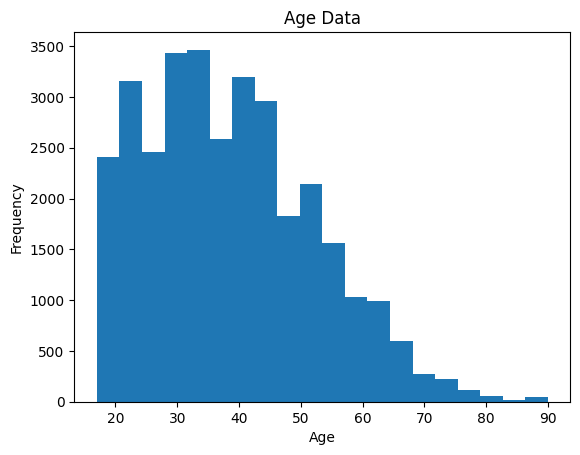

In [83]:
data['age'].plot(kind='hist', bins=20, title='Age Data', xlabel='Age', ylabel='Frequency')
plt.show()


---
### Question 16
Create a **bar chart** showing the count of people in each `workclass` category. Rotate the x-axis labels for readability.

*Hint: Use `data['workclass'].value_counts().plot(kind='bar')`. Use `plt.xticks(rotation=45)` to rotate labels.*

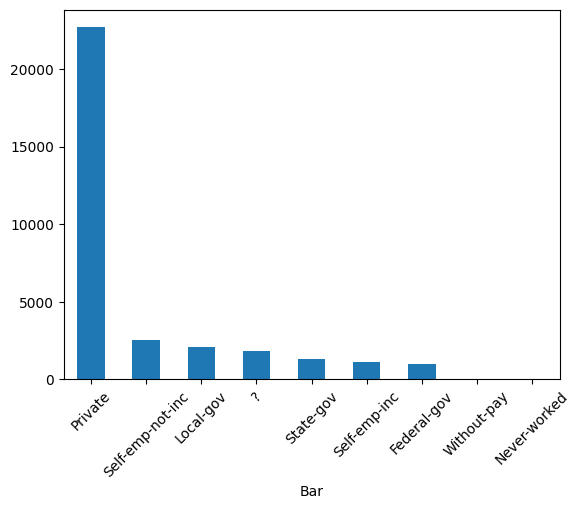

In [86]:
# Your code here
data['workclass'].value_counts().plot(kind='bar', xlabel='Bar')
plt.xticks(rotation=45)
plt.show()


---
### Question 17
Create a **boxplot** comparing the distribution of `age` across the two `salary` groups (`<=50K` and `>50K`).

What can you observe about the age distributions of the two groups?

*Hint: Use `sns.boxplot(x='salary', y='age', data=data)` or `data.boxplot(column='age', by='salary')`.*

<Axes: title={'center': 'age'}, xlabel='salary'>

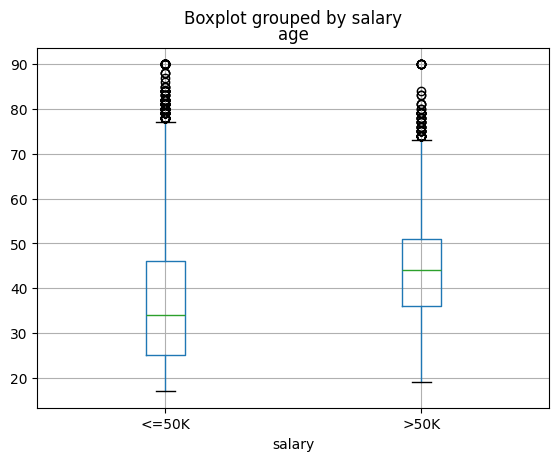

In [ ]:
# Your code here
data.boxplot(column='age', by='salary')

the salary is higher in older ages with the mean of age that is over 50K being higher and more of a range in age occuring in <=50K